### WIDS Datathon Project

In [1]:
!pip install openpyxl

print('Installed openpyxl')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/242.1 kB ? eta -:--:--

     ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/242.1 kB 1.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━ 102.4/242.1 kB 871.3 kB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.6 MB/s eta 0:00:00


Installed openpyxl


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
print('Imported libraries')


Imported libraries


In [3]:
pd.options.display.max_rows =300

In [4]:
'''Read the 1st Excel'''
#excel_path_1='C:\Thripura\My_Personal\Self Learning\WIDS Datathon 2022 - Phase 2\Datathon_EPA_Air_Quality_Demographics_Meteorology_2019.xlsx'
df_1 = pd.read_excel("../input/phase-ii-widsdatathon2022/epa/epa/Datathon_EPA_Air_Quality_Demographics_Meteorology_2019.xlsx",index_col="DATE", parse_dates=True)
print(df_1.head())
print(df_1.count())


                 AQS_ID   LATITUDE  LONGITUDE   COUNTY    STATE  \
DATE                                                              
2019-03-01  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
2019-03-04  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
2019-03-07  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
2019-03-10  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
2019-03-13  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   

                                 CBSA  PEOPLE_OF_COLOR_FRACTION  \
DATE                                                              
2019-03-01  Daphne-Fairhope-Foley, AL                      0.13   
2019-03-04  Daphne-Fairhope-Foley, AL                      0.13   
2019-03-07  Daphne-Fairhope-Foley, AL                      0.13   
2019-03-10  Daphne-Fairhope-Foley, AL                      0.13   
2019-03-13  Daphne-Fairhope-Foley, AL                      0.13   

            LOW_INCOME_FRACTION  LINGUISTICALLY_ISOLATED_FRA

In [5]:
'''Read the 2nd Excel'''

#excel_path_2='C:\Thripura\My_Personal\Self Learning\WIDS Datathon 2022 - Phase 2\Datathon_EPA_Air_Quality_Demographics_Meteorology_2020.xlsx'
df_2 = pd.read_excel("../input/phase-ii-widsdatathon2022/epa/epa/Datathon_EPA_Air_Quality_Demographics_Meteorology_2020.xlsx",index_col="DATE", parse_dates=True)
print(df_2.head())
print(df_2.count())

                 AQS_ID   LATITUDE  LONGITUDE   COUNTY    STATE  \
DATE                                                              
2020-03-01  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
2020-03-04  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
2020-03-07  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
2020-03-10  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   
2020-03-13  01-003-0010  30.497478 -87.880258  Baldwin  Alabama   

                                 CBSA  PEOPLE_OF_COLOR_FRACTION  \
DATE                                                              
2020-03-01  Daphne-Fairhope-Foley, AL                      0.13   
2020-03-04  Daphne-Fairhope-Foley, AL                      0.13   
2020-03-07  Daphne-Fairhope-Foley, AL                      0.13   
2020-03-10  Daphne-Fairhope-Foley, AL                      0.13   
2020-03-13  Daphne-Fairhope-Foley, AL                      0.13   

            LOW_INCOME_FRACTION  LINGUISTICALLY_ISOLATED_FRA

In [6]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
LATITUDE,129470.0,38.533022,4.837426,18.420089,35.320105,39.138773,41.530011,64.845690
LONGITUDE,129470.0,-96.298816,17.693938,-158.088613,-112.095767,-93.512534,-80.341962,-66.150615
PEOPLE_OF_COLOR_FRACTION,129393.0,0.383927,0.303357,0.000000,0.110000,0.320000,0.660000,1.000000
LOW_INCOME_FRACTION,129393.0,0.375089,0.215389,0.000000,0.210000,0.350000,0.540000,0.990000
LINGUISTICALLY_ISOLATED_FRACTION,129393.0,0.049076,0.091215,0.000000,0.000000,0.010000,0.060000,0.680000
LESS_THAN_HS_ED_FRACTION,129393.0,0.147154,0.129474,0.000000,0.060000,0.110000,0.200000,0.720000
TEMPERATURE_CELSIUS,72703.0,13.576014,10.547154,-34.814816,6.828704,14.791667,21.603009,41.018520
RELATIVE_HUMIDITY,50670.0,63.095606,18.520436,1.083333,51.375000,65.833333,76.666667,114.079167
WIND_SPEED_METERS_PER_SECOND,58576.0,2.250522,5.239192,0.000000,1.223949,1.843426,2.793005,833.811646
WIND_DIRECTION,59484.0,189.811975,62.589750,6.375000,147.372917,189.689583,234.041667,349.791667


In [7]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
LATITUDE,133418.0,38.396963,4.753737,18.420089,35.240100,38.986672,41.495110,64.845690
LONGITUDE,133418.0,-96.290902,17.555206,-158.088613,-112.191930,-93.579965,-80.395039,-66.150615
PEOPLE_OF_COLOR_FRACTION,133404.0,0.387406,0.304613,0.000000,0.110000,0.320000,0.650000,1.000000
LOW_INCOME_FRACTION,133404.0,0.376489,0.214970,0.000000,0.210000,0.350000,0.530000,0.990000
LINGUISTICALLY_ISOLATED_FRACTION,133404.0,0.050916,0.094638,0.000000,0.000000,0.010000,0.060000,0.680000
LESS_THAN_HS_ED_FRACTION,133404.0,0.146932,0.130830,0.000000,0.060000,0.110000,0.200000,0.720000
TEMPERATURE_CELSIUS,71845.0,14.628471,9.979496,-36.018517,7.870371,15.349537,22.592592,42.592594
RELATIVE_HUMIDITY,49413.0,60.331166,19.754614,3.541667,46.750000,63.083333,75.333333,100.112500
WIND_SPEED_METERS_PER_SECOND,59659.0,2.151579,1.410811,0.019292,1.198227,1.798412,2.713695,15.386176
WIND_DIRECTION,60329.0,191.810643,62.588574,2.416667,151.250000,193.375000,236.208333,352.958333


In [8]:
df_1_CBSA=df_1.groupby('CBSA').mean()
df_1_CBSA

,LATITUDE,LONGITUDE,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,TEMPERATURE_CELSIUS,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
CBSA,,,,,,,,,,,,,,,,,
"Adrian, MI",41.995568,-83.946559,0.060000,0.370000,0.000000,0.090000,15.557159,NaN,2.184573,191.260675,7.382645,0.041045,NaN,NaN,NaN,NaN,NaN
"Albany-Schenectady-Troy, NY",42.680750,-73.757330,0.260000,0.160000,0.000000,0.060000,NaN,NaN,NaN,NaN,4.987850,0.035804,NaN,0.195741,0.151546,NaN,NaN
"Albuquerque, NM",35.112659,-106.583308,0.612628,0.436670,0.052884,0.159137,13.863065,39.793483,NaN,NaN,5.923814,0.046978,8.927723,0.165881,0.507035,NaN,NaN
"Allentown-Bethlehem-Easton, PA-NJ",40.724090,-75.277321,0.424054,0.350339,0.068768,0.138817,12.084646,67.123660,NaN,NaN,7.823375,0.036339,9.252731,NaN,0.260699,NaN,NaN
"Altoona, PA",40.535278,-78.370833,0.000000,0.470000,0.000000,0.230000,NaN,NaN,NaN,NaN,9.374333,0.037733,NaN,NaN,0.791850,NaN,NaN
"Ann Arbor, MI",42.240565,-83.599602,0.290000,0.440000,0.000000,0.080000,17.530400,NaN,1.810718,192.850151,7.365663,0.038536,NaN,NaN,NaN,NaN,NaN
"Appleton, WI",44.307380,-88.395178,0.040000,0.190000,0.030000,0.040000,NaN,NaN,NaN,NaN,6.921327,0.038232,NaN,NaN,NaN,NaN,NaN
"Ardmore, OK",34.244189,-97.462931,0.030000,0.710000,0.000000,0.200000,NaN,NaN,NaN,NaN,7.697026,0.044543,NaN,NaN,NaN,NaN,NaN
"Athens-Clarke County, GA",33.918137,-83.344385,0.220000,0.360000,0.000000,0.020000,NaN,NaN,NaN,NaN,10.303320,0.043793,NaN,NaN,NaN,NaN,NaN


In [9]:
df_2_CBSA=df_2.groupby('CBSA').mean()

In [10]:
df_2_CBSA.head(260)

,LATITUDE,LONGITUDE,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,TEMPERATURE_CELSIUS,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
CBSA,,,,,,,,,,,,,,,,,
"Adrian, MI",41.995568,-83.946559,0.060000,0.370000,0.000000,0.090000,14.703886,NaN,2.227503,192.387745,7.593333,0.040114,NaN,NaN,NaN,NaN,NaN
"Albany-Schenectady-Troy, NY",42.680750,-73.757330,0.260000,0.160000,0.000000,0.060000,NaN,NaN,NaN,NaN,4.930841,0.035720,NaN,NaN,0.190521,NaN,NaN
"Albuquerque, NM",35.112214,-106.583582,0.613386,0.436819,0.053302,0.159972,14.598636,34.781563,NaN,NaN,7.022919,0.045581,7.743553,0.177834,0.451799,NaN,NaN
"Allentown-Bethlehem-Easton, PA-NJ",40.725571,-75.276162,0.422777,0.350104,0.068727,0.139269,NaN,NaN,NaN,NaN,7.536013,0.034051,9.063141,NaN,0.369015,NaN,NaN
"Altoona, PA",40.535278,-78.370833,0.000000,0.470000,0.000000,0.230000,NaN,NaN,NaN,NaN,7.705740,0.037381,NaN,NaN,0.073821,NaN,NaN
"Ann Arbor, MI",42.240565,-83.599602,0.290000,0.440000,0.000000,0.080000,14.598907,NaN,1.992975,193.752316,7.833969,0.039641,NaN,NaN,NaN,NaN,NaN
"Appleton, WI",44.307380,-88.395178,0.040000,0.190000,0.030000,0.040000,NaN,NaN,NaN,NaN,6.464815,0.038398,NaN,NaN,NaN,NaN,NaN
"Ardmore, OK",34.244189,-97.462931,0.030000,0.710000,0.000000,0.200000,NaN,NaN,NaN,NaN,10.163569,0.043093,NaN,NaN,NaN,NaN,NaN
"Athens-Clarke County, GA",33.918137,-83.344385,0.220000,0.360000,0.000000,0.020000,NaN,NaN,NaN,NaN,8.227615,0.035540,NaN,NaN,NaN,NaN,NaN


In [11]:
'Riverside-San Bernardino-Ontario, CA'

'Riverside-San Bernardino-Ontario, CA'

In [12]:
df_2_RSSBO=df_2[df_2['CBSA']=='Riverside-San Bernardino-Ontario, CA']
df_2_RSSBO

,AQS_ID,LATITUDE,LONGITUDE,COUNTY,STATE,CBSA,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,...,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
DATE,,,,,,,,,,,,,,,,,,,,,
2020-01-01,06-065-0009,33.447867,-117.088649,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.60,0.46,0.21,0.15,...,NaN,NaN,NaN,8.8,0.045,3.712500,NaN,NaN,NaN,NaN
2020-01-02,06-065-0009,33.447867,-117.088649,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.60,0.46,0.21,0.15,...,NaN,NaN,NaN,6.0,0.033,2.729167,NaN,NaN,NaN,NaN
2020-01-05,06-065-0009,33.447867,-117.088649,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.60,0.46,0.21,0.15,...,NaN,NaN,NaN,5.7,0.043,5.016667,NaN,NaN,NaN,NaN
2020-01-09,06-065-0009,33.447867,-117.088649,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.60,0.46,0.21,0.15,...,NaN,NaN,NaN,3.8,0.036,2.708333,NaN,NaN,NaN,NaN
2020-01-11,06-065-0009,33.447867,-117.088649,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.60,0.46,0.21,0.15,...,NaN,NaN,NaN,4.2,0.042,3.654167,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-17,06-071-9004,34.106678,-117.274063,San Bernardino,California,"Riverside-San Bernardino-Ontario, CA",0.97,0.71,0.14,0.60,...,NaN,NaN,NaN,11.3,0.026,22.491667,0.562500,NaN,0.008,NaN
2020-12-20,06-071-9004,34.106678,-117.274063,San Bernardino,California,"Riverside-San Bernardino-Ontario, CA",0.97,0.71,0.14,0.60,...,NaN,NaN,NaN,10.0,0.042,18.270833,0.554167,NaN,NaN,NaN
2020-12-23,06-071-9004,34.106678,-117.274063,San Bernardino,California,"Riverside-San Bernardino-Ontario, CA",0.97,0.71,0.14,0.60,...,NaN,NaN,NaN,11.3,0.040,18.987500,0.537500,NaN,0.008,NaN


In [13]:
df_1_NN = df_1.dropna()
df_1_NN

,AQS_ID,LATITUDE,LONGITUDE,COUNTY,STATE,CBSA,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,...,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-03,06-037-1103,34.06659,-118.22688,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",1.00,0.75,0.25,0.46,...,30.708333,2.310713,105.250000,9.2,0.023,30.700000,0.716667,0.437500,0.009,2.70
2019-01-09,06-037-1103,34.06659,-118.22688,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",1.00,0.75,0.25,0.46,...,67.375000,1.787694,126.500000,13.9,0.022,26.425000,0.725000,0.391667,0.007,2.80
2019-01-15,06-037-1103,34.06659,-118.22688,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",1.00,0.75,0.25,0.46,...,84.750000,3.371755,80.375000,4.4,0.030,15.362500,0.295833,0.033333,0.001,1.00
2019-01-21,06-037-1103,34.06659,-118.22688,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",1.00,0.75,0.25,0.46,...,42.000000,3.719005,310.958333,2.0,0.039,4.779167,0.166667,0.004167,0.002,0.70
2019-01-27,06-037-1103,34.06659,-118.22688,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",1.00,0.75,0.25,0.46,...,28.250000,1.922736,119.583333,8.1,0.036,25.345833,0.595833,0.675000,0.015,2.10
2019-02-02,06-037-1103,34.06659,-118.22688,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",1.00,0.75,0.25,0.46,...,93.541667,3.183125,110.291667,4.9,0.030,10.229167,0.233333,0.025000,0.001,1.00
2019-02-08,06-037-1103,34.06659,-118.22688,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",1.00,0.75,0.25,0.46,...,48.041667,2.563648,107.750000,10.5,0.033,25.554167,0.516667,0.300000,0.007,1.80
2019-02-14,06-037-1103,34.06659,-118.22688,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",1.00,0.75,0.25,0.46,...,91.166667,3.266722,147.416667,4.3,0.030,13.031818,0.290909,0.000000,0.001,1.00
2019-02-20,06-037-1103,34.06659,-118.22688,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",1.00,0.75,0.25,0.46,...,63.083333,2.364301,97.791667,7.3,0.028,20.666667,0.400000,0.090909,0.004,1.56


In [14]:
df_2_NN = df_2.dropna()
df_2_NN

,AQS_ID,LATITUDE,LONGITUDE,COUNTY,STATE,CBSA,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,...,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
DATE,,,,,,,,,,,,,,,,,,,,,
2020-02-21,06-037-1103,34.06659,-118.22688,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",1.00,0.75,0.25,0.46,...,45.041667,2.250695,100.166667,10.9,0.039,25.208333,0.458333,0.320833,0.010,1.7
2020-03-04,06-037-1103,34.06659,-118.22688,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",1.00,0.75,0.25,0.46,...,69.208333,1.562625,144.541667,14.3,0.030,21.387500,0.491667,0.220833,0.008,1.9
2020-03-16,06-037-1103,34.06659,-118.22688,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",1.00,0.75,0.25,0.46,...,75.666667,2.167097,127.083333,5.8,0.028,13.487500,0.308333,0.029167,0.005,1.0
2020-01-10,06-065-8001,33.99958,-117.41601,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.97,0.74,0.18,0.48,...,71.333333,0.683783,209.708333,13.0,0.022,21.737500,0.496292,0.350000,0.005,2.3
2020-01-16,06-065-8001,33.99958,-117.41601,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.97,0.74,0.18,0.48,...,76.833333,1.292542,248.750000,25.0,0.041,20.145833,0.525042,0.525000,0.006,2.4
2020-02-03,06-065-8001,33.99958,-117.41601,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.97,0.74,0.18,0.48,...,20.916667,4.010523,42.458333,3.5,0.040,3.645833,0.128042,0.133333,0.004,0.7
2020-02-09,06-065-8001,33.99958,-117.41601,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.97,0.74,0.18,0.48,...,69.291667,1.978468,91.791667,10.6,0.039,8.675000,0.193542,0.129167,0.005,1.0
2020-02-21,06-065-8001,33.99958,-117.41601,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.97,0.74,0.18,0.48,...,35.625000,1.290398,199.291667,8.7,0.046,20.662500,0.309667,0.395833,0.006,1.4
2020-03-04,06-065-8001,33.99958,-117.41601,Riverside,California,"Riverside-San Bernardino-Ontario, CA",0.97,0.74,0.18,0.48,...,46.166667,1.106056,255.208333,10.9,0.047,21.720000,0.380375,0.437500,0.005,1.8


In [15]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133418 entries, 2020-03-01 to 2020-11-23
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   AQS_ID                            133418 non-null  object 
 1   LATITUDE                          133418 non-null  float64
 2   LONGITUDE                         133418 non-null  float64
 3   COUNTY                            133418 non-null  object 
 4   STATE                             133418 non-null  object 
 5   CBSA                              121424 non-null  object 
 6   PEOPLE_OF_COLOR_FRACTION          133404 non-null  float64
 7   LOW_INCOME_FRACTION               133404 non-null  float64
 8   LINGUISTICALLY_ISOLATED_FRACTION  133404 non-null  float64
 9   LESS_THAN_HS_ED_FRACTION          133404 non-null  float64
 10  TEMPERATURE_CELSIUS               71845 non-null   float64
 11  RELATIVE_HUMIDITY                 49

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129470 entries, 2019-03-01 to 2019-12-20
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   AQS_ID                            129470 non-null  object 
 1   LATITUDE                          129470 non-null  float64
 2   LONGITUDE                         129470 non-null  float64
 3   COUNTY                            129470 non-null  object 
 4   STATE                             129470 non-null  object 
 5   CBSA                              117210 non-null  object 
 6   PEOPLE_OF_COLOR_FRACTION          129393 non-null  float64
 7   LOW_INCOME_FRACTION               129393 non-null  float64
 8   LINGUISTICALLY_ISOLATED_FRACTION  129393 non-null  float64
 9   LESS_THAN_HS_ED_FRACTION          129393 non-null  float64
 10  TEMPERATURE_CELSIUS               72703 non-null   float64
 11  RELATIVE_HUMIDITY                 50

In [17]:
df_1['COUNTY'].value_counts()

Maricopa       2525
Salt Lake      2161
Riverside      2028
Washington     1956
Jefferson      1940
               ... 
Missoula         47
Shasta           47
Saint Clair      37
McHenry          37
Ellis            33
Name: COUNTY, Length: 351, dtype: int64

In [18]:
df_1.corr() 

,LATITUDE,LONGITUDE,PEOPLE_OF_COLOR_FRACTION,LOW_INCOME_FRACTION,LINGUISTICALLY_ISOLATED_FRACTION,LESS_THAN_HS_ED_FRACTION,TEMPERATURE_CELSIUS,RELATIVE_HUMIDITY,WIND_SPEED_METERS_PER_SECOND,WIND_DIRECTION,PM25_UG_PER_CUBIC_METER,OZONE_PPM,NO2_PPB,CO_PPM,SO2_PPB,LEAD_UG_PER_CUBIC_METER,BENZENE_PPBC
LATITUDE,1.000000,0.189144,-0.462128,-0.215728,-0.220349,-0.267396,-0.416590,0.141049,0.052020,0.110537,-0.146103,-0.094163,-0.145869,-0.074972,0.194408,-0.202764,-0.061531
LONGITUDE,0.189144,1.000000,-0.226340,-0.106510,-0.230461,-0.152277,-0.075029,0.260830,0.014777,-0.035073,0.082632,-0.073068,-0.052587,-0.188091,-0.186386,-0.203958,-0.020450
PEOPLE_OF_COLOR_FRACTION,-0.462128,-0.226340,1.000000,0.510822,0.552322,0.605176,0.265387,-0.094116,-0.035338,-0.024500,0.156881,0.031789,0.351235,0.220231,-0.043104,0.157704,0.160934
LOW_INCOME_FRACTION,-0.215728,-0.106510,0.510822,1.000000,0.338428,0.592987,0.155956,-0.137221,-0.044728,-0.004188,0.131291,0.029000,0.224818,0.109275,0.006903,0.111215,0.232972
LINGUISTICALLY_ISOLATED_FRACTION,-0.220349,-0.230461,0.552322,0.338428,1.000000,0.636337,0.170888,-0.106379,0.025219,0.067068,0.069969,0.040867,0.246660,0.169589,-0.034074,0.187847,0.063838
LESS_THAN_HS_ED_FRACTION,-0.267396,-0.152277,0.605176,0.592987,0.636337,1.000000,0.184506,-0.050500,-0.020296,0.038286,0.138382,0.032111,0.243171,0.180706,-0.006144,0.180319,0.195223
TEMPERATURE_CELSIUS,-0.416590,-0.075029,0.265387,0.155956,0.170888,0.184506,1.000000,-0.245338,-0.057685,-0.045597,0.143382,0.401834,-0.046934,-0.098502,-0.126212,0.176116,-0.104959
RELATIVE_HUMIDITY,0.141049,0.260830,-0.094116,-0.137221,-0.106379,-0.050500,-0.245338,1.000000,-0.030303,-0.147767,0.052894,-0.460817,-0.086793,-0.065741,-0.133056,-0.319531,-0.079040
WIND_SPEED_METERS_PER_SECOND,0.052020,0.014777,-0.035338,-0.044728,0.025219,-0.020296,-0.057685,-0.030303,1.000000,0.046818,-0.064107,-0.012067,-0.067779,-0.050045,0.003894,-0.046302,-0.097525
WIND_DIRECTION,0.110537,-0.035073,-0.024500,-0.004188,0.067068,0.038286,-0.045597,-0.147767,0.046818,1.000000,-0.082139,0.104997,-0.079083,-0.102629,0.043386,-0.021161,-0.010566


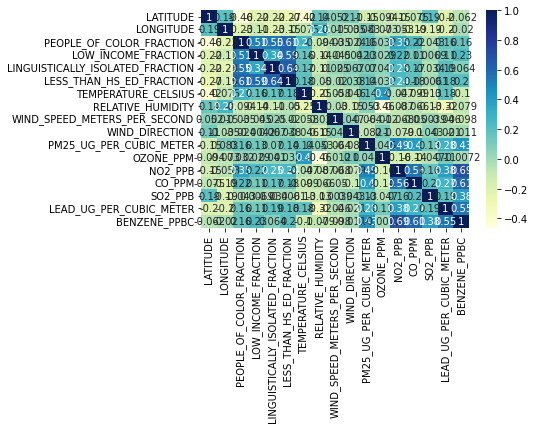

In [19]:
# DF-1 All values
dataplot = sns.heatmap(df_1.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(50,20)})
# displaying heatmap
plt.show()

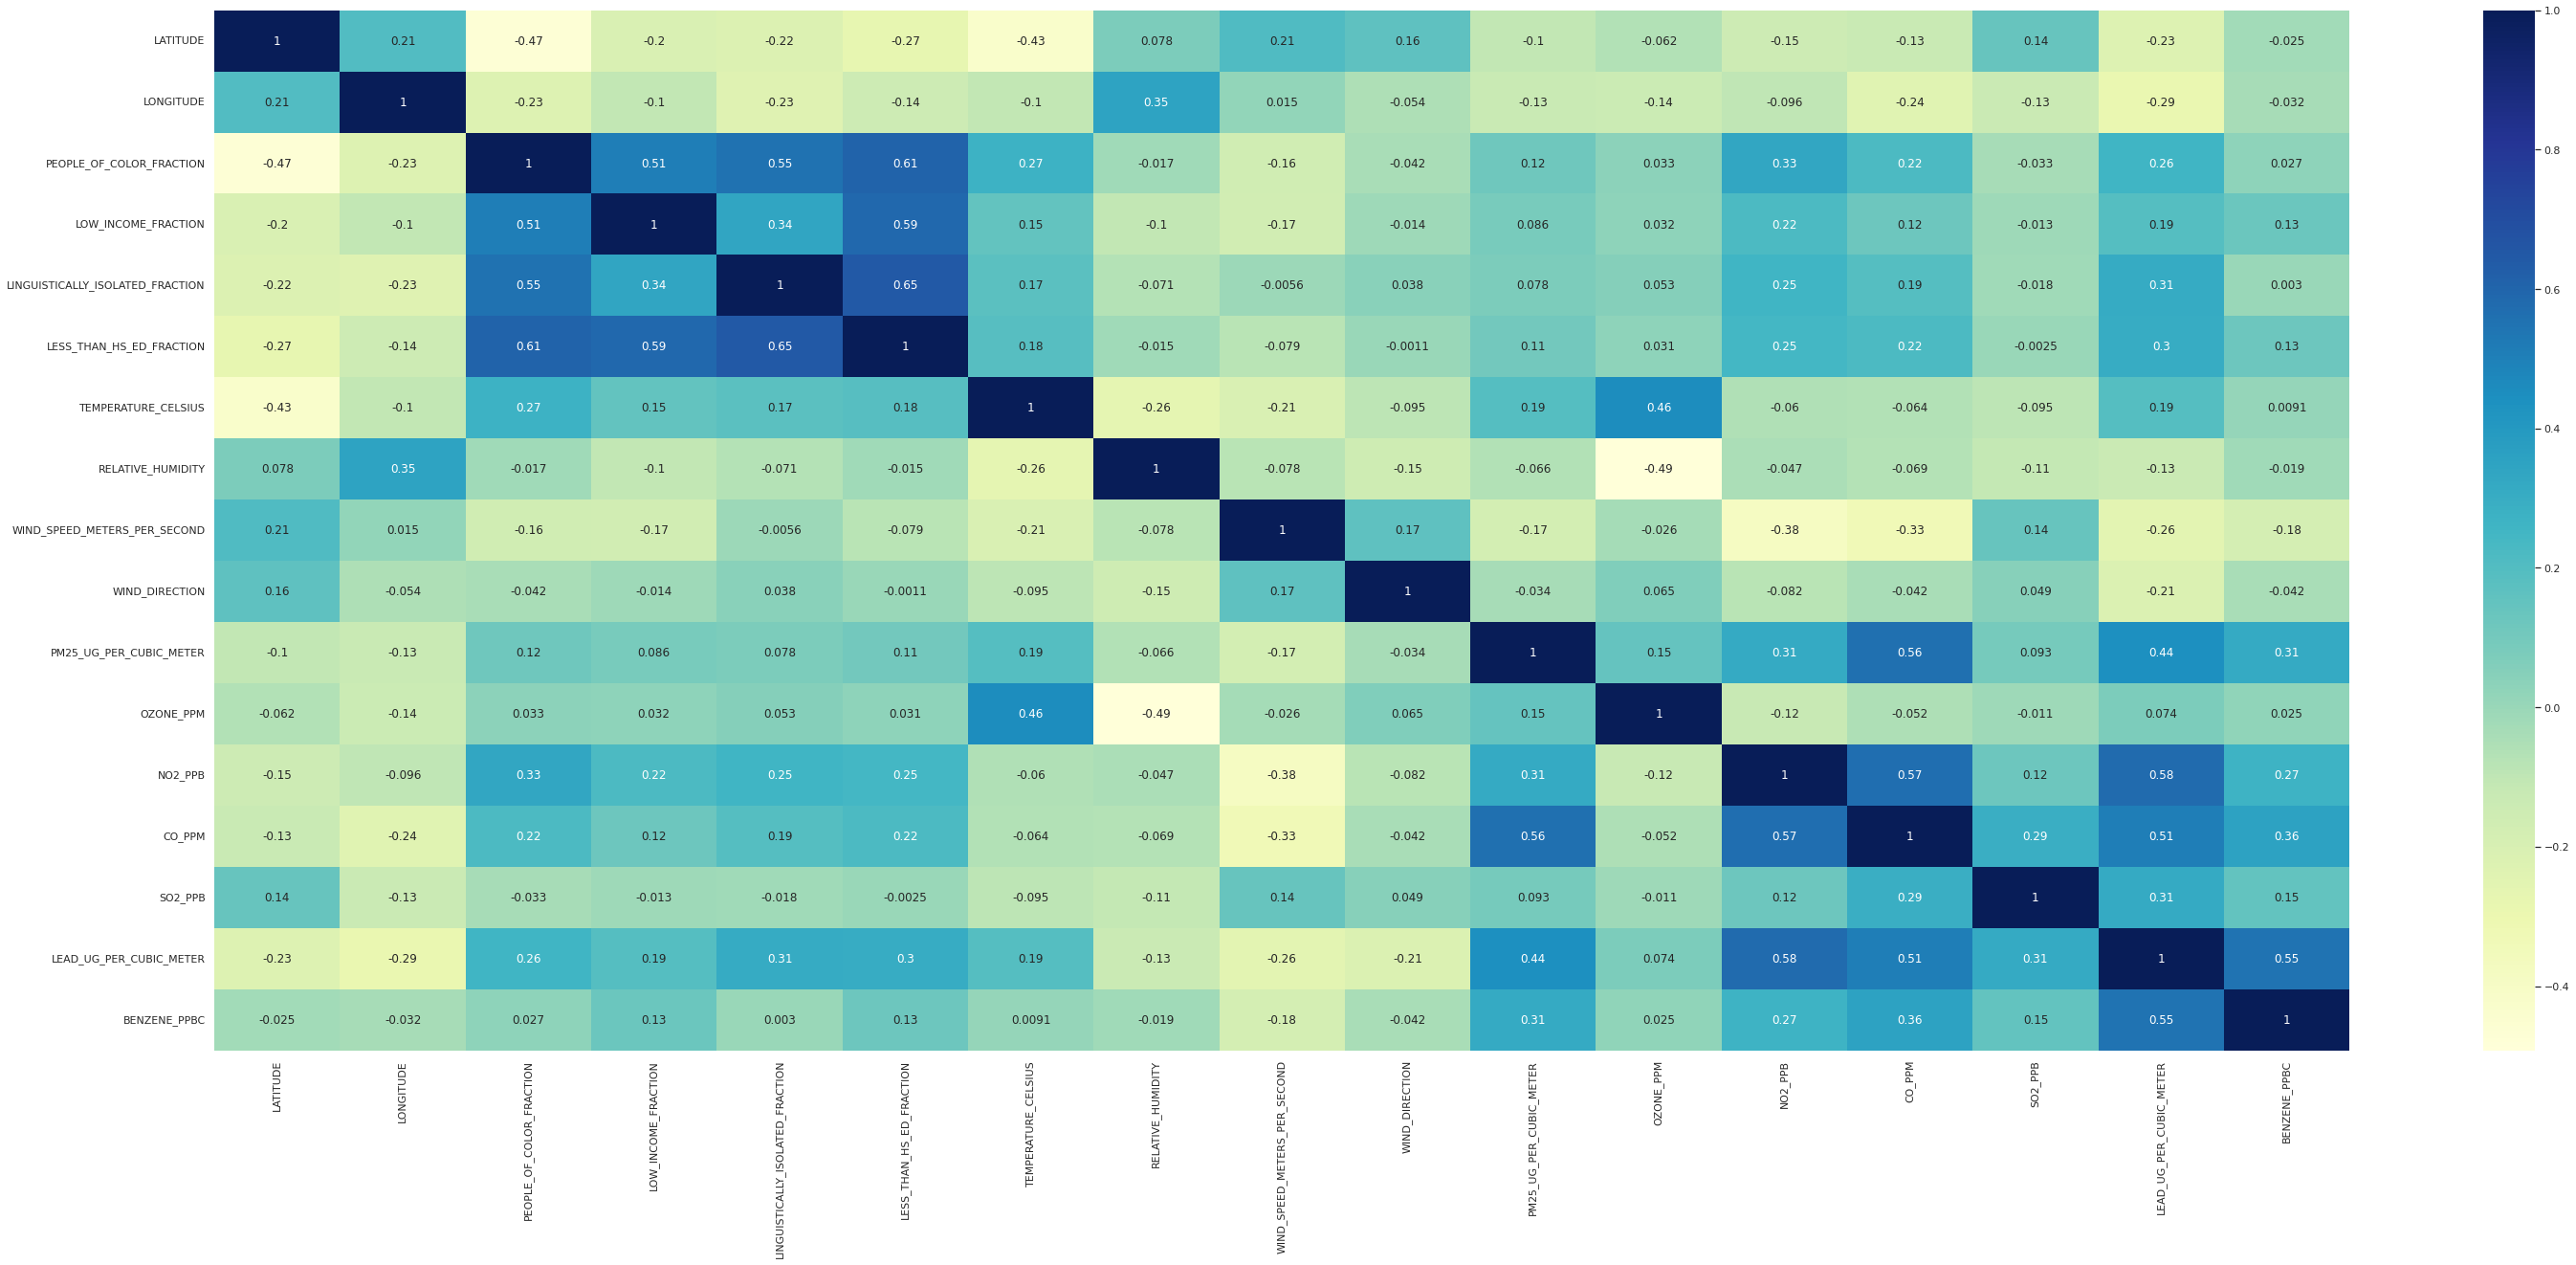

In [20]:
# DF-2 All values
dataplot1 = sns.heatmap(df_2.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(15,8)})
# displaying heatmap
plt.show(dataplot1)

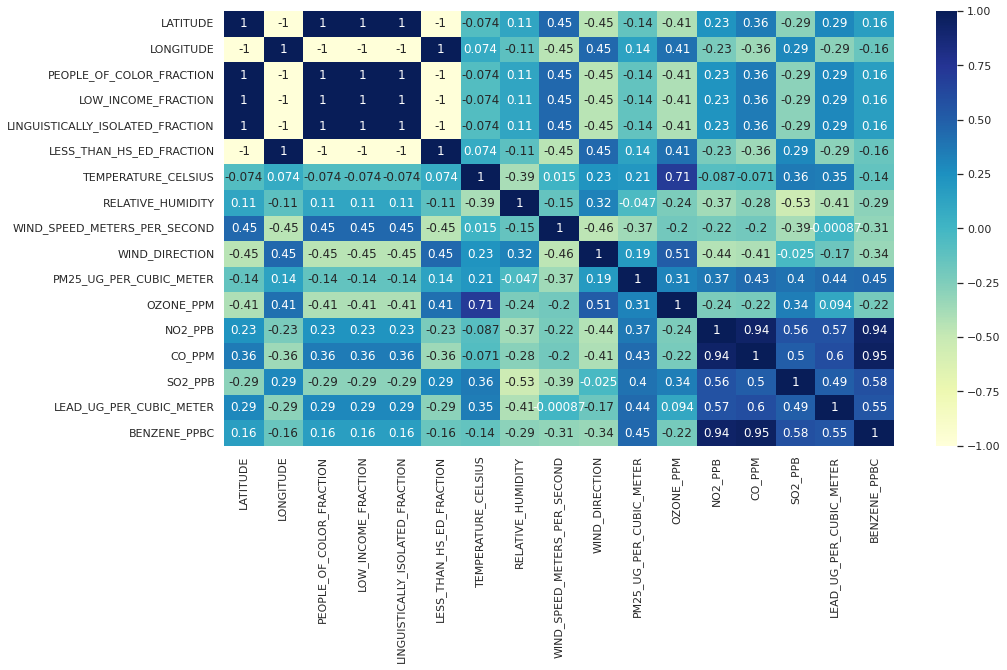

In [21]:
# DF-1 Non null values only
dataplot3_NN = sns.heatmap(df_1_NN.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(15,8)})
# displaying heatmap
plt.show(dataplot3_NN)

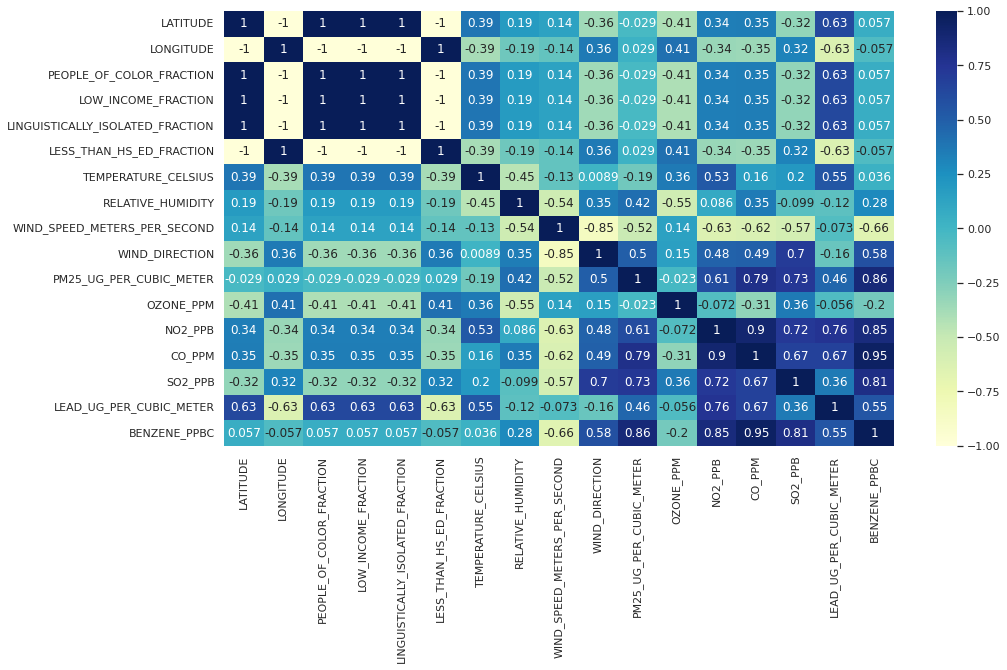

In [22]:
# DF-2 Non null values only
dataplot4_NN = sns.heatmap(df_2_NN.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(15,8)})
# displaying heatmap
plt.show(dataplot4_NN)

In [ ]:
sns.pairplot(df_1)
sns.set(rc = {'figure.figsize':(100,80)})
plt.show()

In [ ]:
#params_with_notnull
df_All_1=df_1[['AQS_ID','LATITUDE','LONGITUDE','COUNTY','STATE','CBSA','PEOPLE_OF_COLOR_FRACTION','LOW_INCOME_FRACTION','LINGUISTICALLY_ISOLATED_FRACTION','LESS_THAN_HS_ED_FRACTION','PM25_UG_PER_CUBIC_METER','OZONE_PPM']]       
df_All_1

In [ ]:
df_All_1.corr() 

In [ ]:
# DF-1 Non null values only
dataplot5_df_All_1 = sns.heatmap(df_All_1.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(15,8)})
# displaying heatmap
plt.show(dataplot5_df_All_1)

In [ ]:
# DF-2 Non null columns only
dataplot6_df_All_2 = sns.heatmap(df_All_2.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(15,8)})
# displaying heatmap
plt.show(dataplot6_df_All_2)

In [ ]:
#params_with_nonnull
df_All_2=df_2[['AQS_ID','LATITUDE','LONGITUDE','COUNTY','STATE','CBSA','PEOPLE_OF_COLOR_FRACTION','LOW_INCOME_FRACTION','LINGUISTICALLY_ISOLATED_FRACTION','LESS_THAN_HS_ED_FRACTION','PM25_UG_PER_CUBIC_METER','OZONE_PPM']]       
df_All_2

In [ ]:
df_NA_CBSA=df_1[df_1['CBSA'].isna()]
df_NA_CBSA

In [ ]:
df_NA_CBSA_2=df_2[df_2['CBSA'].isna()]
df_NA_CBSA_2

In [ ]:
df_All_1_CBSA=df_All_1.groupby('CBSA').mean()
df_All_1_CBSA

In [ ]:
df_2['COUNTY'].value_counts()